In [69]:
library(readxl)
library(dplyr)
library(ggplot2)
library(ggrepel)

In [70]:
setwd("/home/ylee/blast/result/")

# Lihan's Data

In [3]:
RNAseq_Actg1 <- read_excel("dst176_RNAseq_Dooley_Lihan_05_22_rnaseq.xlsx", sheet = "bigmatrix", skip = 11, col_types = "text")

numeric_columns <- c(
  'NSD_vs_FLD baseMean', 'NSD_vs_FLD baseMeanA NSD', 'NSD_vs_FLD baseMeanB FLD', 
  'NSD_vs_FLD log2FoldChange FLD/NSD', 'NSD_vs_FLD pvalue', 'NSD_vs_FLD padj', 
  'NSD_vs_FLD significant', 'PTC_vs_FLD baseMean', 'PTC_vs_FLD baseMeanA PTC', 
  'PTC_vs_FLD baseMeanB FLD', 'PTC_vs_FLD log2FoldChange FLD/PTC', 'PTC_vs_FLD pvalue', 
  'PTC_vs_FLD padj', 'PTC_vs_FLD significant', 'PTC_vs_NSD baseMean', 
  'PTC_vs_NSD baseMeanA PTC', 'PTC_vs_NSD baseMeanB NSD', 'PTC_vs_NSD log2FoldChange NSD/PTC', 
  'PTC_vs_NSD pvalue', 'PTC_vs_NSD padj', 'PTC_vs_NSD significant', 'WT_vs_FLD baseMean', 
  'WT_vs_FLD baseMeanA WT', 'WT_vs_FLD baseMeanB FLD', 'WT_vs_FLD log2FoldChange FLD/WT', 
  'WT_vs_FLD pvalue', 'WT_vs_FLD padj', 'WT_vs_FLD significant', 'WT_vs_NSD baseMean', 
  'WT_vs_NSD baseMeanA WT', 'WT_vs_NSD baseMeanB NSD', 'WT_vs_NSD log2FoldChange NSD/WT', 
  'WT_vs_NSD pvalue', 'WT_vs_NSD padj', 'WT_vs_NSD significant', 'WT_vs_PTC baseMean', 
  'WT_vs_PTC baseMeanA WT', 'WT_vs_PTC baseMeanB PTC', 'WT_vs_PTC log2FoldChange PTC/WT', 
  'WT_vs_PTC pvalue', 'WT_vs_PTC padj', 'WT_vs_PTC significant', 'WT_1', 'WT_2', 'WT_3', 
  'PTC_1', 'PTC_2', 'PTC_3', 'NSD_1', 'NSD_2', 'NSD_3', 'FLD_1', 'FLD_2', 'FLD_3', 
  'condition mean WT', 'condition mean PTC', 'condition mean NSD', 'condition mean FLD'
)

RNAseq_Actg1 <- RNAseq_Actg1 %>%
  mutate(across(all_of(numeric_columns), as.numeric))

Warning message:
“There were 42 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(all_of(numeric_columns),
  as.numeric)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 41
  remaining warnings.”


In [37]:
head(RNAseq_Actg1, 1)

Ensembl gene id,Ensembl gene,Ensembl biotype,UniProt proteins,UniProt genes,UniProt accessions,UniProt names,UniProt Ensembl transcripts,UniProt Ensembl proteins,UniProt Ensembl gene ids,⋯,NSD_1,NSD_2,NSD_3,FLD_1,FLD_2,FLD_3,condition mean WT,condition mean PTC,condition mean NSD,condition mean FLD
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000031328,Flna,protein_coding,"Filamin-A; Filamin, alpha, Filamin-A","Flna, Fln, Fln1; Flna, RP23-436K3.1-015; Flna, RP23-436K3.1-013; Flna, RP23-436K3.1-002",Q8BTM8; J3JS91; B7FAV1; B7FAU9,FLNA_MOUSE; J3JS91_MOUSE; B7FAV1_MOUSE; B7FAU9_MOUSE,"ENSMUST00000033699; ENSMUST00000150554; ENSMUST00000130007; ENSMUST00000101454, ENSMUST00000114299","ENSMUSP00000033699; ENSMUSP00000116758; ENSMUSP00000121082; ENSMUSP00000098997, ENSMUSP00000109938",ENSMUSG00000031328,⋯,5255,5180,5566,5612,4505,4556,4575,5510,5333,4891


In [4]:
colnames(RNAseq_Actg1) <- gsub(" ", "_", colnames(RNAseq_Actg1))
colnames(RNAseq_Actg1) <- gsub("/", "7", colnames(RNAseq_Actg1))

In [5]:
rownames(RNAseq_Actg1) <- RNAseq_Actg1$Ensembl_gene_id

Warning message:
“Setting row names on a tibble is deprecated.”


In [6]:
colnames(RNAseq_Actg1)

[1] "Ensembl_gene_id"                   "Ensembl_gene"                     
 [3] "Ensembl_biotype"                   "UniProt_proteins"                 
 [5] "UniProt_genes"                     "UniProt_accessions"               
 [7] "UniProt_names"                     "UniProt_Ensembl_transcripts"      
 [9] "UniProt_Ensembl_proteins"          "UniProt_Ensembl_gene_ids"         
[11] "Ensembl_chr"                       "Ensembl_start"                    
[13] "Ensembl_stop"                      "Ensembl_strand"                   
[15] "KEGG_PATHWAY_terms"                "KEGG_PATHWAY_ids"                 
[17] "Gene_Ontology_terms"               "Gene_Ontology_ids"                
[19] "NSD_vs_FLD_baseMean"               "NSD_vs_FLD_baseMeanA_NSD"         
[21] "NSD_vs_FLD_baseMeanB_FLD"          "NSD_vs_FLD_log2FoldChange_FLD7NSD"
[23] "NSD_vs_FLD_pvalue"                 "NSD_vs_FLD_padj"                  
[25] "NSD_vs_FLD_significant"            "PTC_vs_FLD_baseMean"              
[27] "PTC_vs_FLD_baseMeanA_PTC"          "PTC_vs_FLD_baseMeanB_FLD"         
[29] "PTC_vs_FLD_log2FoldChange_FLD7PTC" "PTC_vs_FLD_pvalue"                
[31] "PTC_vs_FLD_padj"                   "PTC_vs_FLD_significant"           
[33] "PTC_vs_NSD_baseMean"               "PTC_vs_NSD_baseMeanA_PTC"         
[35] "PTC_vs_NSD_baseMeanB_NSD"          "PTC_vs_NSD_log2FoldChange_NSD7PTC"
[37] "PTC_vs_NSD_pvalue"                 "PTC_vs_NSD_padj"                  
[39] "PTC_vs_NSD_significant"            "WT_vs_FLD_baseMean"               
[41] "WT_vs_FLD_baseMeanA_WT"            "WT_vs_FLD_baseMeanB_FLD"          
[43] "WT_vs_FLD_log2FoldChange_FLD7WT"   "WT_vs_FLD_pvalue"                 
[45] "WT_vs_FLD_padj"                    "WT_vs_FLD_significant"            
[47] "WT_vs_NSD_baseMean"                "WT_vs_NSD_baseMeanA_WT"           
[49] "WT_vs_NSD_baseMeanB_NSD"           "WT_vs_NSD_log2FoldChange_NSD7WT"  
[51] "WT_vs_NSD_pvalue"                  "WT_vs_NSD_padj"                   
[53] "WT_vs_NSD_significant"             "WT_vs_PTC_baseMean"               
[55] "WT_vs_PTC_baseMeanA_WT"            "WT_vs_PTC_baseMeanB_PTC"          
[57] "WT_vs_PTC_log2FoldChange_PTC7WT"   "WT_vs_PTC_pvalue"                 
[59] "WT_vs_PTC_padj"                    "WT_vs_PTC_significant"            
[61] "WT_1"                              "WT_2"                             
[63] "WT_3"                              "PTC_1"                            
[65] "PTC_2"                             "PTC_3"                            
[67] "NSD_1"                             "NSD_2"                            
[69] "NSD_3"                             "FLD_1"                            
[71] "FLD_2"                             "FLD_3"                            
[73] "condition_mean_WT"                 "condition_mean_PTC"               
[75] "condition_mean_NSD"                "condition_mean_FLD"

In [234]:
RNAseq_Actg1$GeneName = rownames(RNAseq_Actg1)
#marked_genes <- RNAseq_Actg1[-log10(RNAseq_Actg1$WT_vs_FLD_padj) >100, ]
marked_gene1 <- RNAseq_Actg1[(RNAseq_Actg1$Ensembl_gene == "Actg1"), ]
marked_gene2 <- RNAseq_Actg1[(RNAseq_Actg1$Ensembl_gene == "Actg2"), ]

RNAseq_Actg1$Gene_Class="Non-significant"
RNAseq_Actg1$Gene_Class[RNAseq_Actg1$WT_vs_FLD_log2FoldChange_FLD7WT>0.1 & RNAseq_Actg1$WT_vs_FLD_padj<0.05]="UP-regulated"
RNAseq_Actg1$Gene_Class[RNAseq_Actg1$WT_vs_FLD_log2FoldChange_FLD7WT< -0.1 & RNAseq_Actg1$WT_vs_FLD_padj<0.05]="Down-regulated"

Actg1_volcano_plot_FLD <- ggplot(RNAseq_Actg1, aes(x=WT_vs_FLD_log2FoldChange_FLD7WT, y = -log10(WT_vs_FLD_padj))) +
    geom_point(aes(color=Gene_Class), size = 1.5) +
    geom_point(data=subset(RNAseq_Actg1, Ensembl_gene %in% c("Actg1", "Actg2")), 
                 aes(x=WT_vs_FLD_log2FoldChange_FLD7WT, y = -log10(WT_vs_FLD_padj)),
                 color="black", size=2) +
    geom_text_repel(data=marked_gene1, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-4, hjust=1.5, size=4) +
    geom_text_repel(data=marked_gene2, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-4, hjust=-2, size=4) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "#e0e0e0") +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed", color = "#e0e0e0") +
  scale_color_manual(values = c("dodgerblue3", "gray50", "firebrick3")) +
  labs(title = "Volcano Plot", x = "log2 Fold Change", y = "-log10(P-value)") +
  theme(panel.background=element_blank(), axis.line=element_line(size=.5)) + 
  scale_x_continuous(limits = c(-10, 10)) +
  scale_y_continuous(limits = c(-5, 300))

Warning message:
“Removed 812 rows containing missing values or values outside the scale
range (`geom_point()`).”


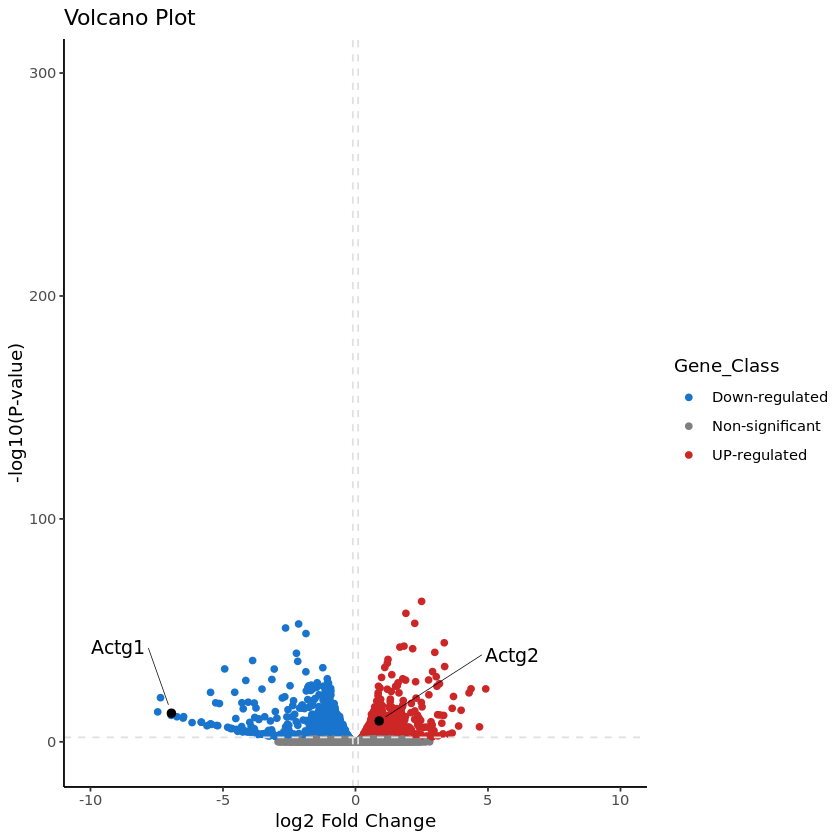

In [235]:
Actg1_volcano_plot_FLD

In [263]:
RNAseq_Actg1$GeneName = rownames(RNAseq_Actg1)
# marked_genes <- RNAseq_Actg1[(-log10(RNAseq_Actg1$WT_vs_PTC_padj) >140 | RNAseq_Actg1$Ensembl_gene == "Actg2"), ]
marked_gene1 <- RNAseq_Actg1[(RNAseq_Actg1$Ensembl_gene == "Actg1"), ]
marked_gene2 <- RNAseq_Actg1[(RNAseq_Actg1$Ensembl_gene == "Actg2"), ]

RNAseq_Actg1$Gene_Class="Non-significant"
RNAseq_Actg1$Gene_Class[RNAseq_Actg1$WT_vs_PTC_log2FoldChange_PTC7WT>0.1 & RNAseq_Actg1$WT_vs_PTC_padj<0.05]="UP-regulated"
RNAseq_Actg1$Gene_Class[RNAseq_Actg1$WT_vs_PTC_log2FoldChange_PTC7WT< -0.1 & RNAseq_Actg1$WT_vs_PTC_padj<0.05]="Down-regulated"

Actg1_volcano_plot_PTC <- ggplot(RNAseq_Actg1, aes(x=WT_vs_PTC_log2FoldChange_PTC7WT, y = -log10(WT_vs_PTC_padj))) +
  geom_point(aes(color=Gene_Class), size = 1.5) +
    geom_point(data=subset(RNAseq_Actg1, Ensembl_gene %in% c("Actg1", "Actg2")), 
                 aes(x=WT_vs_PTC_log2FoldChange_PTC7WT, y = -log10(WT_vs_PTC_padj)),
                 color="black", size=2) +
    geom_text_repel(data=marked_gene1, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-5, hjust=6, size=4) +
    geom_text_repel(data=marked_gene2, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-1.5, hjust=0.5, size=4) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "#e0e0e0") +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed", color = "#e0e0e0") +
  scale_color_manual(values = c("dodgerblue3", "gray50", "firebrick3")) +
  labs(title = "Volcano Plot", x = "log2 Fold Change", y = "-log10(P-value)") +
  theme(panel.background=element_blank(), axis.line=element_line(size=.5)) +
  scale_x_continuous(limits = c(-10, 10)) +
  scale_y_continuous(limits = c(-5, 300))

Warning message:
“Removed 703 rows containing missing values or values outside the scale
range (`geom_point()`).”


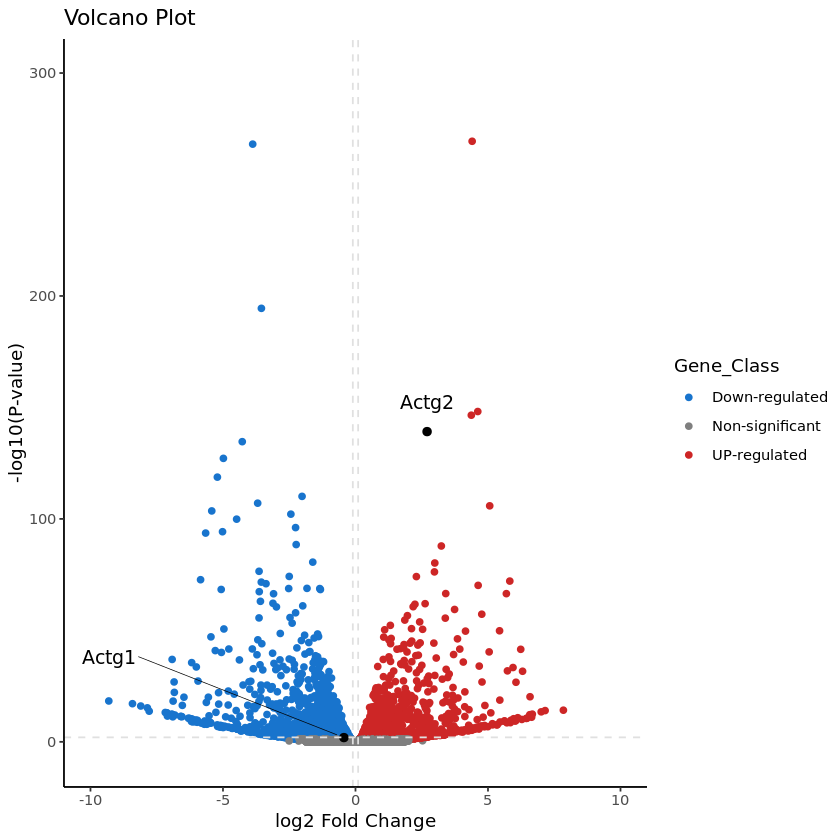

In [264]:
Actg1_volcano_plot_PTC

In [265]:
ggsave("Actg1_volcano_plot_FLD.pdf", plot = Actg1_volcano_plot_FLD, width = 7, height = 6)
ggsave("Actg1_volcano_plot_PTC.pdf", plot = Actg1_volcano_plot_PTC, width = 7, height = 6)

Warning message:
“Removed 812 rows containing missing values or values outside the scale
range (`geom_point()`).”
Warning message:
“Removed 703 rows containing missing values or values outside the scale
range (`geom_point()`).”


# Vahan's Data

In [77]:
RNAseq_calm1 <- read_excel("calm-1ptc_rnaseq_dst180_RNAseq_Vahan_05_22_rnaseq (Autosaved).xlsx", sheet = "bigmatrix", skip = 11, col_types = "text")

In [82]:
RNAseq_calm1 <- read_excel("calm-1ptc_rnaseq_dst180_RNAseq_Vahan_05_22_rnaseq (Autosaved).xlsx", sheet = "bigmatrix", skip = 11, col_types = "text")

numeric_columns <- c(
    'FLD_vs_PTC baseMean', 'FLD_vs_PTC baseMeanA FLD', 'FLD_vs_PTC baseMeanB PTC', 
    'FLD_vs_PTC log2FoldChange PTC/FLD', 'FLD_vs_PTC pvalue', 'FLD_vs_PTC padj', 
    'WT_vs_FLD baseMean', 'WT_vs_FLD baseMeanA WT', 'WT_vs_FLD baseMeanB FLD', 
    'WT_vs_FLD log2FoldChange FLD/WT', 'WT_vs_FLD pvalue', 'WT_vs_FLD padj', 'WT_vs_PTC baseMean', 
    'WT_vs_PTC baseMeanA WT', 'WT_vs_PTC baseMeanB PTC', 'WT_vs_PTC log2FoldChange PTC/WT', 
    'WT_vs_PTC pvalue', 'WT_vs_PTC padj', 'WT_vs_PTC significant', 'WT_1', 'WT_2', 'WT_3', 'FLD_1', 
    'FLD_2', 'FLD_3', 'PTC_1', 'PTC_2', 'PTC_3', 'condition mean WT', 'condition mean FLD', 'condition mean PTC'
)

RNAseq_calm1 <- RNAseq_calm1 %>%
  mutate(across(all_of(numeric_columns), as.numeric))

Warning message:
“There were 19 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(all_of(numeric_columns), as.numeric)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 18 remaining warnings.”


In [83]:
colnames(RNAseq_calm1) <- gsub(" ", "_", colnames(RNAseq_calm1))
colnames(RNAseq_calm1) <- gsub("/", "7", colnames(RNAseq_calm1))

In [85]:
rownames(RNAseq_calm1) <- RNAseq_calm1$Ensembl_gene_id

Warning message:
“Setting row names on a tibble is deprecated.”


In [84]:
colnames(RNAseq_calm1)

[1] "Ensembl_gene_id"                   "Ensembl_gene"                     
 [3] "Ensembl_biotype"                   "UniProt_proteins"                 
 [5] "UniProt_genes"                     "UniProt_accessions"               
 [7] "UniProt_names"                     "UniProt_Ensembl_transcripts"      
 [9] "UniProt_Ensembl_proteins"          "UniProt_Ensembl_gene_ids"         
[11] "Ensembl_chr"                       "Ensembl_start"                    
[13] "Ensembl_stop"                      "Ensembl_strand"                   
[15] "KEGG_PATHWAY_terms"                "KEGG_PATHWAY_ids"                 
[17] "Gene_Ontology_terms"               "Gene_Ontology_ids"                
[19] "GSEA_collection_h"                 "GSEA_collection_c2"               
[21] "FLD_vs_PTC_baseMean"               "FLD_vs_PTC_baseMeanA_FLD"         
[23] "FLD_vs_PTC_baseMeanB_PTC"          "FLD_vs_PTC_log2FoldChange_PTC7FLD"
[25] "FLD_vs_PTC_pvalue"                 "FLD_vs_PTC_padj"                  
[27] "FLD_vs_PTC_significant"            "WT_vs_FLD_baseMean"               
[29] "WT_vs_FLD_baseMeanA_WT"            "WT_vs_FLD_baseMeanB_FLD"          
[31] "WT_vs_FLD_log2FoldChange_FLD7WT"   "WT_vs_FLD_pvalue"                 
[33] "WT_vs_FLD_padj"                    "WT_vs_FLD_significant"            
[35] "WT_vs_PTC_baseMean"                "WT_vs_PTC_baseMeanA_WT"           
[37] "WT_vs_PTC_baseMeanB_PTC"           "WT_vs_PTC_log2FoldChange_PTC7WT"  
[39] "WT_vs_PTC_pvalue"                  "WT_vs_PTC_padj"                   
[41] "WT_vs_PTC_significant"             "WT_1"                             
[43] "WT_2"                              "WT_3"                             
[45] "FLD_1"                             "FLD_2"                            
[47] "FLD_3"                             "PTC_1"                            
[49] "PTC_2"                             "PTC_3"                            
[51] "condition_mean_WT"                 "condition_mean_FLD"               
[53] "condition_mean_PTC"

In [197]:
RNAseq_calm1$GeneName = rownames(RNAseq_calm1)
#marked_genes <- RNAseq_calm1[-log10(RNAseq_calm1$WT_vs_FLD_padj) >100, ]
marked_gene1 <- RNAseq_calm1[(RNAseq_calm1$Ensembl_gene == "calm-1"), ]
marked_gene2 <- RNAseq_calm1[(RNAseq_calm1$Ensembl_gene == "C29E4.14"), ]

RNAseq_calm1$Gene_Class="Non-significant"
RNAseq_calm1$Gene_Class[RNAseq_calm1$WT_vs_FLD_log2FoldChange_FLD7WT>0.1 & RNAseq_calm1$WT_vs_FLD_padj<0.05]="UP-regulated"
RNAseq_calm1$Gene_Class[RNAseq_calm1$WT_vs_FLD_log2FoldChange_FLD7WT< -0.1 & RNAseq_calm1$WT_vs_FLD_padj<0.05]="Down-regulated"

calm1_volcano_plot_FLD <- ggplot(RNAseq_calm1, aes(x=WT_vs_FLD_log2FoldChange_FLD7WT, y = -log10(WT_vs_FLD_padj))) +
    geom_point(aes(color=Gene_Class), size = 1.5) +
    geom_point(data=subset(RNAseq_calm1, Ensembl_gene %in% c("calm-1", "C29E4.14")), 
                 aes(x=WT_vs_FLD_log2FoldChange_FLD7WT, y = -log10(WT_vs_FLD_padj)),
                 color="black", size=2) +
    geom_text_repel(data=marked_gene1, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-2, hjust=2, size=4) +
    geom_text_repel(data=marked_gene2, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=2, hjust=-1, size=4) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "#e0e0e0") +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed", color = "#e0e0e0") +
  scale_color_manual(values = c("dodgerblue3", "gray50", "firebrick3")) +
  labs(title = "Volcano Plot", x = "log2 Fold Change", y = "-log10(P-value)") +
  theme(panel.background=element_blank(), axis.line=element_line(size=.5)) + 
  scale_x_continuous(limits = c(-10, 10)) +
  scale_y_continuous(limits = c(-5, 300))

Warning message:
“Removed 195 rows containing missing values or values outside the scale
range (`geom_point()`).”


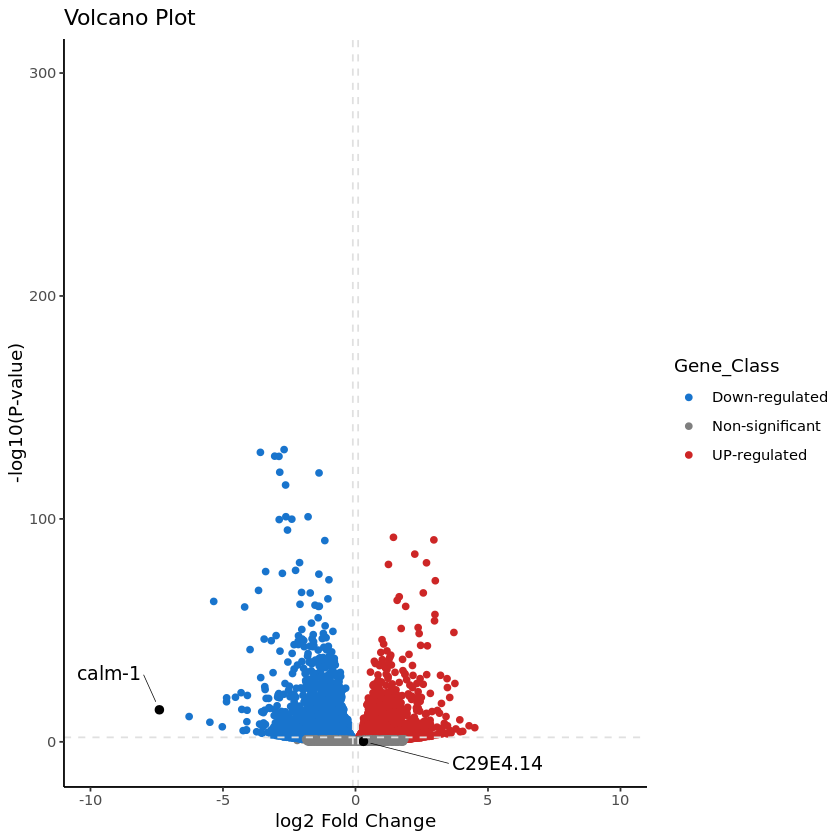

In [198]:
calm1_volcano_plot_FLD

In [199]:
RNAseq_calm1$GeneName = rownames(RNAseq_calm1)
# marked_genes <- RNAseq_calm1[(-log10(RNAseq_calm1$WT_vs_PTC_padj) >140 | RNAseq_calm1$Ensembl_gene == "Actg2"), ]
marked_gene1 <- RNAseq_calm1[(RNAseq_calm1$Ensembl_gene == "calm-1"), ]
marked_gene2 <- RNAseq_calm1[(RNAseq_calm1$Ensembl_gene == "C29E4.14"), ]

RNAseq_calm1$Gene_Class="Non-significant"
RNAseq_calm1$Gene_Class[RNAseq_calm1$WT_vs_PTC_log2FoldChange_PTC7WT>0.1 & RNAseq_calm1$WT_vs_PTC_padj<0.05]="UP-regulated"
RNAseq_calm1$Gene_Class[RNAseq_calm1$WT_vs_PTC_log2FoldChange_PTC7WT< -0.1 & RNAseq_calm1$WT_vs_PTC_padj<0.05]="Down-regulated"

calm1_volcano_plot_PTC <- ggplot(RNAseq_calm1, aes(x=WT_vs_PTC_log2FoldChange_PTC7WT, y = -log10(WT_vs_PTC_padj))) +
    geom_point(aes(color=Gene_Class), size = 1.5) +
    geom_point(data=subset(RNAseq_calm1, Ensembl_gene %in% c("calm-1", "C29E4.14")), 
                 aes(x=WT_vs_PTC_log2FoldChange_PTC7WT, y = -log10(WT_vs_PTC_padj)),
                 color="black", size=2) +
    geom_text_repel(data=marked_gene1, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=-2.5, hjust=3, size=4) +
    geom_text_repel(data=marked_gene2, aes(label=Ensembl_gene), 
                  box.padding = 0.5, point.padding = 0.5, 
                  segment.color = "black", segment.size = 0.2,
                  vjust=0, hjust=-3, size=4) +
  geom_hline(yintercept = -log10(0.01), linetype = "dashed", color = "#e0e0e0") +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed", color = "#e0e0e0") +
  scale_color_manual(values = c("dodgerblue3", "gray50", "firebrick3")) +
  labs(title = "Volcano Plot", x = "log2 Fold Change", y = "-log10(P-value)") +
  theme(panel.background=element_blank(), axis.line=element_line(size=.5)) +
  scale_x_continuous(limits = c(-10, 10)) +
  scale_y_continuous(limits = c(-5, 300))

Warning message:
“Removed 329 rows containing missing values or values outside the scale
range (`geom_point()`).”


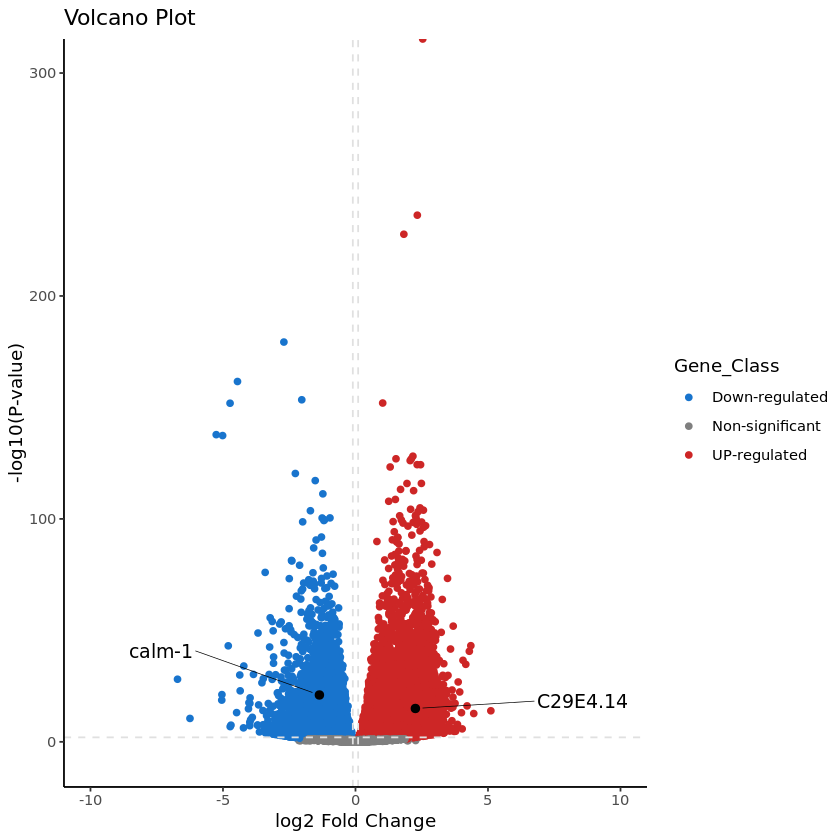

In [200]:
calm1_volcano_plot_PTC

In [ ]:
ggsave("calm1_volcano_plot_FLD.pdf", plot = calm1_volcano_plot_FLD, width = 7, height = 6)
ggsave("calm1_volcano_plot_PTC.pdf", plot = calm1_volcano_plot_PTC, width = 7, height = 6)